In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import time
import datetime
import xarray
from mpas_xarray import preprocess_mpas, remove_repeated_time_index
from mpl_toolkits.basemap import Basemap

%pylab inline
pylab.rcParams['figure.figsize'] = (16, 10) # Large figures
pylab.rcParams['image.cmap'] = 'seismic'
dpi=200;

Populating the interactive namespace from numpy and matplotlib


In [2]:
### axis_font = {'fontname':'Arial', 'size':'18'}    
title_font = {'fontname':'Arial', 'size':'32', 'color':'black', 'weight':'normal'}
matplotlib.rc('xtick', labelsize=28)
matplotlib.rc('ytick', labelsize=28)

In [88]:
infiles='/lcrc/group/acme/lvanroe/regridded/rgr/mpasoHIST_gcaseFCT_highGM.0001-0009.nc'
dsMPASGM1800 = xarray.open_dataset(infiles)
infiles='/lcrc/group/acme/lvanroe/regridded/rgr/mpasoHIST_gcaseFCT.0001-0009.nc'
dsMPASLowGM = xarray.open_dataset(infiles)

In [4]:
mesh60 = xarray.open_dataset('/home/ccsm-data/inputdata/ocn/mpas-o/oEC60to30v3/oEC60to30v3_60layer.170506.nc')

In [77]:
#build a mask
pd = dsMPAS2.potentialDensity[0,:,:,:].values
mask = np.zeros_like(pd)
mask2 = np.zeros_like(pd)
for i in range(pd.shape[0]):
    for j in range(pd.shape[1]):
        for k in range(pd.shape[2]):
            if pd[i,j,k] < 900:
                mask[i,j,k] = np.nan
                mask2[i,j,k] = 1.0
            else:
                mask[i,j,k] = 1.0

In [89]:
pd1800 = dsMPASGM1800.potentialDensity[0,:,:,:].values
pd600 = dsMPASLowGM.potentialDensity[0,:,:,:].values
zm1800 =np.nanmean((pd1800*mask),axis=2)
zm600 = np.nanmean((pd600*mask),axis=2)

/lcrc/group/acme/lvanroe/conda/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
/lcrc/group/acme/lvanroe/conda/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.


In [99]:
inds=np.where((dsMPAS.lon.values > -69) & (dsMPAS.lon.values < -67))[0]
start = inds[0]
stop = inds[-1]
zm1800 =np.nanmean((pd1800[:,:,start:stop]*mask[:,:,start:stop]),axis=2)
zm600 = np.nanmean((pd600[:,:,start:stop]*mask[:,:,start:stop]),axis=2)
maskav = np.mean(mask2[:,:,start:stop],axis=2)

/lcrc/group/acme/lvanroe/conda/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/lcrc/group/acme/lvanroe/conda/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """


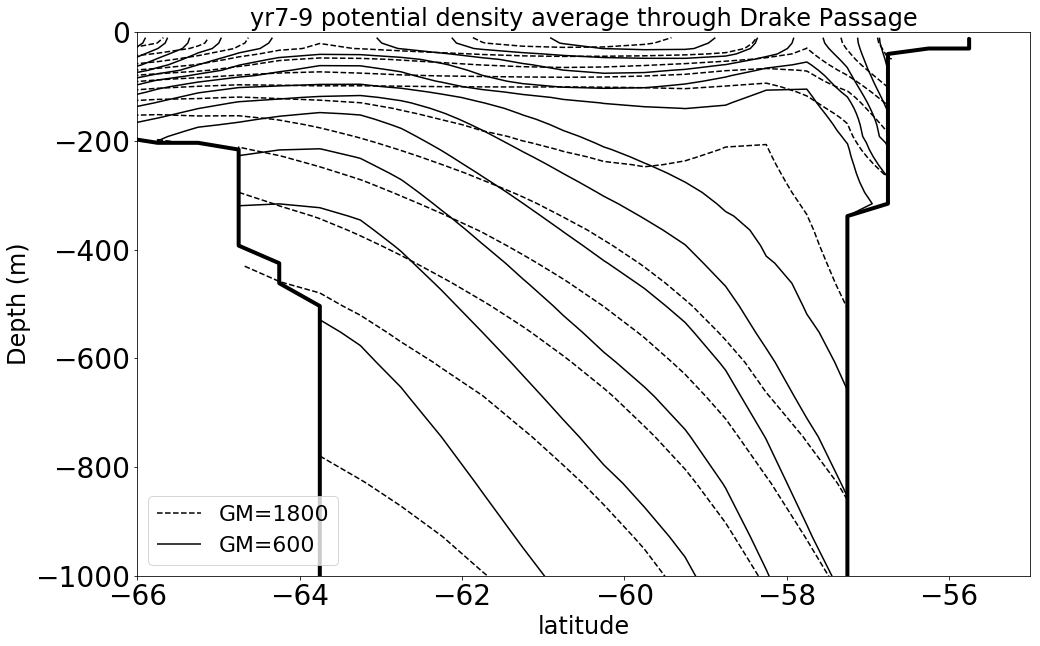

In [101]:
fig,ax = plt.subplots()
CS1 = ax.contour(dsMPASLowGM.lat,-mesh60.refBottomDepth,zm600[:,:],levels=np.linspace(1026,1028.3,21),colors='k')
CS2 = ax.contour(dsMPASGM1800.lat,-mesh60.refBottomDepth,zm1800[:,:],levels=np.linspace(1026,1028.3,21),colors='k',linestyles='dashed')
ax.contour(dsMPAS.lat,-mesh60.refBottomDepth,maskav,levels=[0,1],colors='k',linewidths=4)
ax.set_xlim(-66,-55)
ax.set_ylim(-1000,0)
ax.set_ylabel('Depth (m)',fontsize=24)
ax.set_xlabel('latitude',fontsize=24)
ax.set_title('yr7-9 potential density average through Drake Passage',fontsize=24)
labels = ['GM=1800','GM=600']
lines = [CS2.collections[0],CS1.collections[0]]
plt.legend(lines,labels,fontsize=22,loc='lower left')

In [69]:
zm2

array([[           nan,            nan,            nan, ...,
         1025.33167742,  1025.31876303,  1025.31702354],
       [           nan,            nan,            nan, ...,
         1025.34733686,  1025.33438194,  1025.33279565],
       [           nan,            nan,            nan, ...,
         1025.45857901,  1025.44793026,  1025.44006406],
       ..., 
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan]])

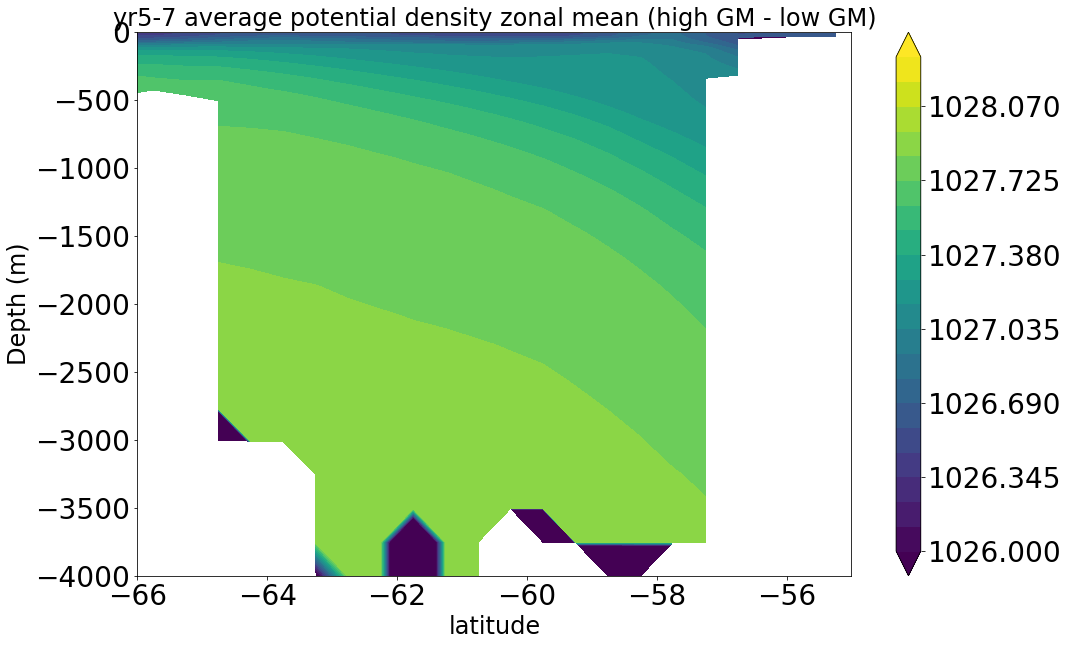

In [26]:
plt.contourf(dsMPAS.lat,-mesh60.refBottomDepth,zm1[:,:],extend='both',levels=np.linspace(1026,1028.3,21),cmap='viridis')
plt.colorbar()
plt.xlim(-66,-55)
plt.ylim(-4000,0)
plt.ylabel('Depth (m)',fontsize=24)
plt.xlabel('latitude',fontsize=24)
plt.title('yr5-7 average potential density zonal mean (high GM - low GM)',fontsize=24)

In [8]:
dsMPAS.lat.shape

(360,)

In [2]:
infiles='/lcrc/group/acme/lvanroe/regridded/rgr/mpaso_baseB_wvel.0001-0004.nc'
dsMPAS = xarray.open_dataset(infiles)
infiles='/lcrc/group/acme/lvanroe/regridded/rgr/mpaso_GcaseBase.0010-0011.nc'
dsMPASG = xarray.open_dataset(infiles)
infiles='/lcrc/group/acme/lvanroe/regridded/rgr/popWVEL.0001-0005.nc'
dsPOP = xarray.open_dataset(infiles,decode_times=False)

infiles='/lcrc/group/acme/lvanroe/regridded/rgr/mpascice.0001-0005.nc'
dsMPASice = xarray.open_dataset(infiles)
infiles='/lcrc/group/acme/lvanroe/regridded/rgr/cice.0001-0005.nc'
dsCICE = xarray.open_dataset(infiles,decode_times=False)

infiles = '/lcrc/group/acme/lvanroe/rgr/rearrange.nc'
dsOHC = xarray.open_dataset(infiles)

In [8]:
#load data
basedir = '/lcrc/group/acme/lvanroe/OAFLUX/'
lhData = xarray.open_mfdataset(basedir+'lh_oaflux*',concat_dim='time').mean(axis=0)
shData = xarray.open_mfdataset(basedir+'sh_oaflux*',concat_dim='time').mean(axis=0)
qnetData = xarray.open_mfdataset(basedir+'qnet*',concat_dim='time').mean(axis=0)
swData = xarray.open_mfdataset(basedir+'sw_isccp*',concat_dim='time').mean(axis=0)
lwData = xarray.open_mfdataset(basedir+'lw_isccp*',concat_dim='time').mean(axis=0)


In [9]:
#create a single dataset of observations
OAFluxFull = swData.update(-lwData);
OAFluxFull.update(-lhData);
OAFluxFull.update(-shData);
OAFluxFull.update(qnetData);

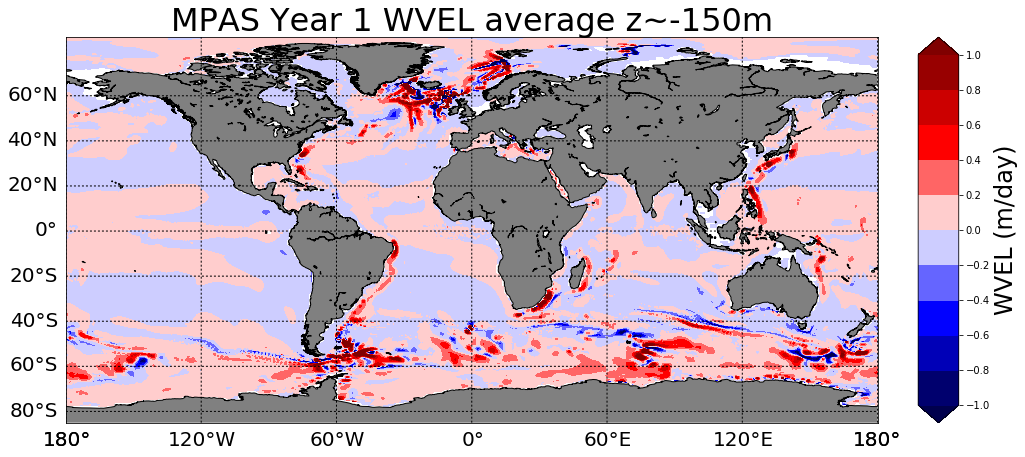

In [16]:
rtd = 180./np.pi
nskip = 5

cLabel = 'WVEL (m/day)'
minval = -1
maxval = 1
start = 0
stop = 12
title = 'MPAS Year 1 WVEL average z~-150m'
field = dsMPAS.timeMonthly_avg_vertTransportVelocityTop[start:stop,29,:,:].mean(axis=0).values*86400 + \
            0.*86400*dsPOP.WVEL[start:stop,5,:,:].mean(axis=0).values

MPASMean = np.nansum(dsMPASG.timeMonthly_avg_activeTracers_temperature[:12,0,:,:].mean(axis=0).values*dsMPASG.area.values) \
            / np.nansum(dsMPAS.area.values)
POPMean = np.nansum(dsMPASG.timeMonthly_avg_activeTracers_temperature[0,0,:,:].mean(axis=0).values*dsMPASG.area.values) \
            / np.nansum(dsMPASG.area.values)
    
fig = plt.figure()
m = Basemap(projection='cyl', llcrnrlat=-85, urcrnrlat=86, llcrnrlon=-180,
                        urcrnrlon=180, resolution='l')
x, y = m(dsMPAS.lon.values, dsMPAS.lat.values)  # compute map proj coordinates
xx, yy = meshgrid(x, y)

m.drawcoastlines()
m.fillcontinents(color='grey', lake_color='white')
m.drawparallels(np.arange(-80., 80., 20.),fontsize=20,
                labels=[True, False, False, False]);
m.drawmeridians(np.arange(-180., 180., 60.),fontsize=20,
                labels=[False, False, False, True]);
    
if abs(maxval) > 10:
    rspot = -1
elif abs(maxval) > 1:
    rspot = 0
else:
    rspot = 2

minval = round(minval, rspot)
maxval = round(maxval, rspot)

tickbounds = np.linspace(minval,maxval,11)
#for i in range(len(tickbounds)):
#    tickbounds[i] = round(tickbounds[i],rspot)

cs = m.contourf(xx,yy,field,levels=tickbounds,extend='both');
cbar = m.colorbar(cs, location='right', pad="5%", spacing='uniform', \
                 ticks=tickbounds, boundaries=tickbounds)
cbar.set_label(cLabel,fontsize=24)
plt.title(title,fontsize=32)

lon1 = -175
lat1 = -75

x1, y1 = m(lon1, lat1)

#plt.text(x1, y1, 'MPAS Global Mean = {0:.2f}'.format(MPASMean),fontsize=18,
#                    ha='left',va='center',color='k',
#                    bbox=dict(facecolor='w', alpha=0.8))

lon1 = 72
lat1 = -75

x1, y1 = m(lon1, lat1)

#plt.text(x1, y1, 'POP Global Mean = {0:.2f}'.format(POPMean),fontsize=18,
#                    ha='left',va='center',color='k',
#                    bbox=dict(facecolor='w', alpha=0.8))

In [19]:
field = OAFluxFull[fieldDict[cLabel][1]].values
m = Basemap(projection='cyl', llcrnrlat=-85, urcrnrlat=86, llcrnrlon=0,
                        urcrnrlon=360, resolution='l')
x, y = m(OAFluxFull.lon[:].values, OAFluxFull.lat[:].values-89.5)  # compute map proj coordinates
xx, yy = meshgrid(x, y)

m.drawcoastlines()
m.fillcontinents(color='grey', lake_color='white')
m.drawparallels(np.arange(-80., 80., 20.),fontsize=20,
                labels=[True, False, False, False]);
m.drawmeridians(np.arange(-180., 180., 60.),fontsize=20,
                labels=[False, False, False, True]);

cs = m.contourf(xx,yy,field,levels=tickbounds,extend='both');
cbar = m.colorbar(cs, location='right', pad="5%", spacing='uniform', \
                 ticks=tickbounds, boundaries=tickbounds)
cbar.set_label(cLabel,fontsize=24)

NameError: name 'OAFluxFull' is not defined